# Features_net.py

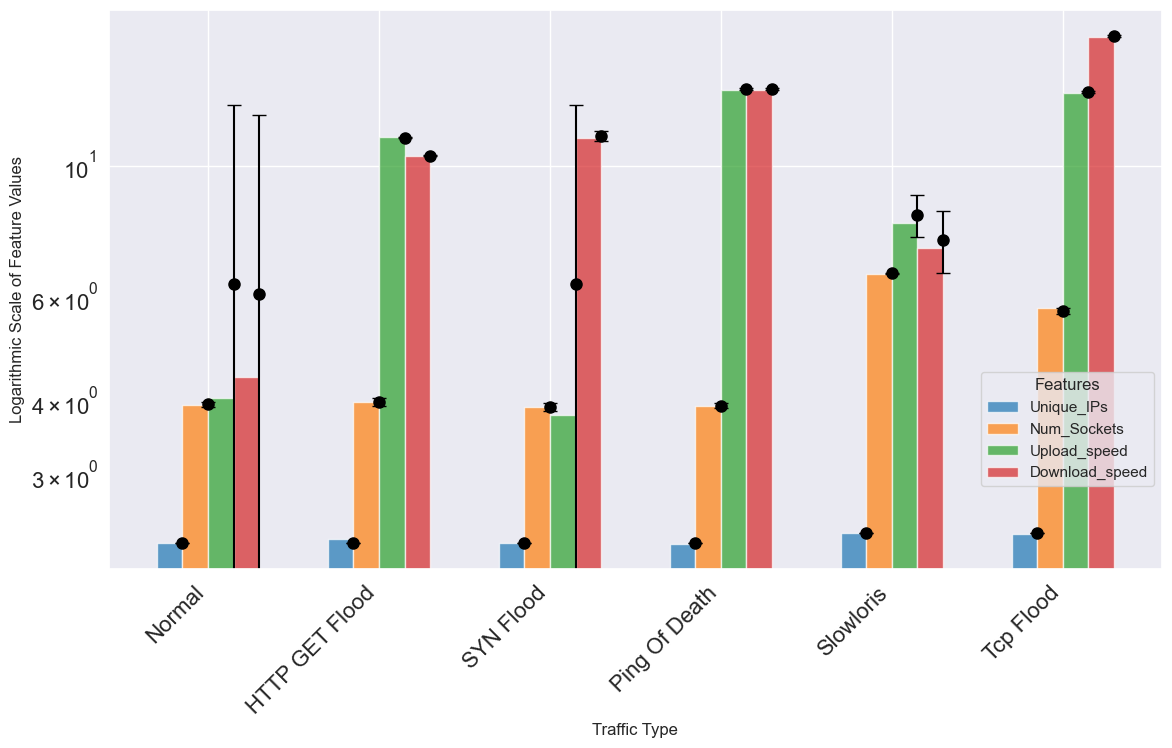

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file into a DataFrame
df = pd.read_csv("Data/labeled_db.csv", parse_dates=["Timestamp"])

# Define the desired order of features within each bar group
desired_feature_order = ['Unique_IPs',
                         'Num_Sockets', 'Upload_speed', 'Download_speed']

# Ensure the selected features are present in the dataset
features = [feature for feature in desired_feature_order if feature in df.columns]

# Apply a logarithmic scale to the features (adding a small constant to avoid log(0))
df[features] = np.log1p(df[features])

# Define consistent colors for each feature
feature_colors = plt.cm.tab10.colors[:len(features)]

SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels


# Create a grouped bar chart for each feature
fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.15
positions = np.arange(len(df['Attack_Type'].unique()))

# Define a mapping for attack type names
attack_type_mapping = {
    'normal': 'Normal',
    'syn flood': 'SYN Flood',
    'http-get flood': 'HTTP GET Flood',
    'TCP flood': 'TCP Flood'
    # Add other attack types as needed
}

# Iterate over attack types and plot each one side by side for each feature
for i, attack_type in enumerate(df['Attack_Type'].unique()):
    attack_data = df[df['Attack_Type'] == attack_type][features]

    # Plot bars for each feature with consistent colors and desired order
    bars = ax.bar(i + np.arange(len(features)) * bar_width,
                  attack_data[desired_feature_order].mean(), width=bar_width, color=feature_colors, alpha=0.7)

    # Add markers for the 25th and 75th percentiles
    ax.errorbar(i + np.arange(len(features)) * bar_width + bar_width / 2,
                attack_data[desired_feature_order].median(),
                yerr=[attack_data[feature].median() - attack_data[feature].quantile(0.25)
                      for feature in desired_feature_order],
                fmt='o', color='black', markersize=8, capsize=5, label='_nolegend_')

# Create a legend with consistent colors and feature labels
ax.legend(bars, desired_feature_order, title='Features',
          loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5))
# ax.legend(bars, desired_feature_order, title='Features',
#           loc='upper right', bbox_to_anchor=(0.5, 0., 0.5, 0.5))
# ax.legend(loc='lower right')
ax.set_ylabel('Logarithmic Scale of Feature Values')
# ax.legend(loc=1)
plt.yscale('log')  # Use logarithmic scale for the Y-axis
plt.xlabel('Traffic Type')
plt.xticks(np.arange(len(df['Attack_Type'].unique())) + (bar_width * (len(features) - 1) / 2), [
           attack_type_mapping.get(att_type.lower(), att_type.title()) for att_type in df['Attack_Type'].unique()])
plt.xticks(rotation=45, ha='right')
plt.tight_layout(rect=[0, 0, 1, 0.97])  # Adjust the subplot layout

fig.savefig('figure/ddos-net.png')
plt.show()


# Features_sys.py file

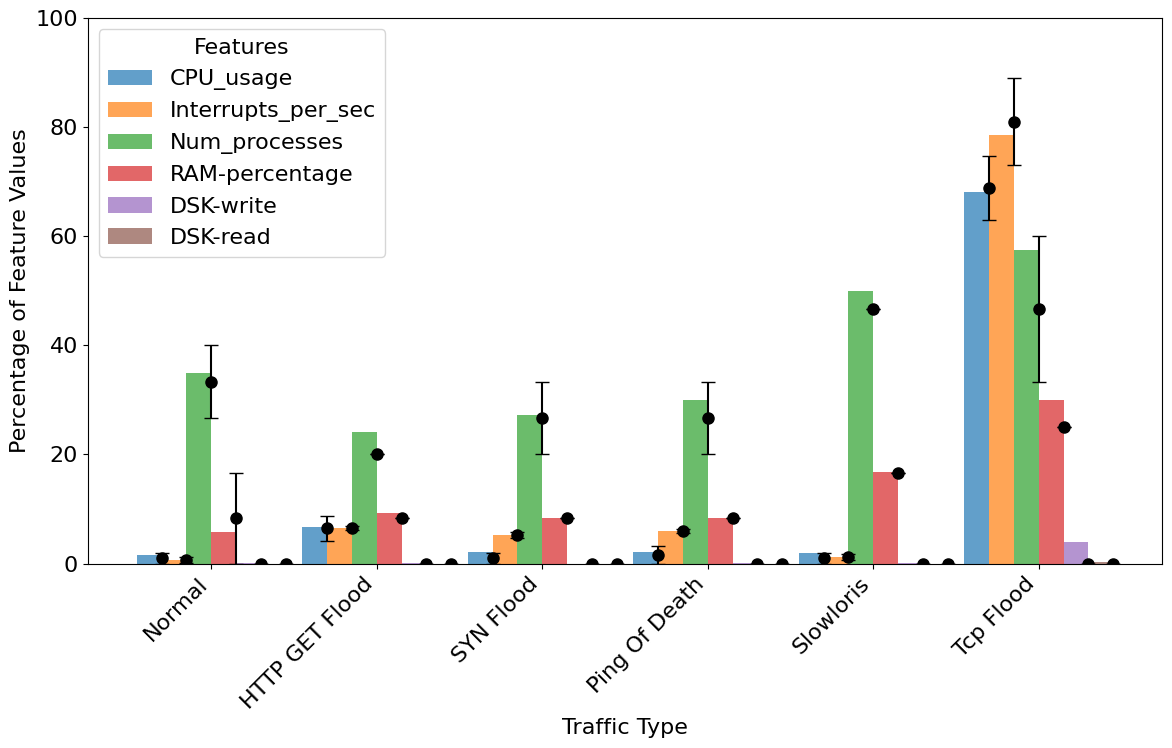

In [21]:
# Define the desired order of features within each bar group
desired_feature_order = ['CPU_usage', 'Interrupts_per_sec',
                         'Num_processes', 'RAM-percentage', 'DSK-write', 'DSK-read']

# Ensure the selected features are present in the dataset
features = [feature for feature in desired_feature_order if feature in df.columns]

# Normalize values to be in the range of 0 to 100%
df[features] = df[features].apply(lambda x: (
    x - x.min()) / (x.max() - x.min()) * 100)

# Define consistent colors for each feature
feature_colors = plt.cm.tab10.colors[:len(features)]

# Create a grouped bar chart for each feature
fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.15
positions = np.arange(len(df['Attack_Type'].unique()))

# Define a mapping for attack type names
attack_type_mapping = {
    'normal': 'Normal',
    'syn flood': 'SYN Flood',
    'http-get flood': 'HTTP GET Flood',
    'TCP flood': 'TCP Flood'
    # Add other attack types as needed
}

# Iterate over attack types and plot each one side by side for each feature
for i, attack_type in enumerate(df['Attack_Type'].unique()):
    attack_data = df[df['Attack_Type'] == attack_type][features]

    # Plot bars for each feature with consistent colors and desired order
    bars = ax.bar(i + np.arange(len(features)) * bar_width,
                  attack_data[desired_feature_order].mean(), width=bar_width, color=feature_colors, alpha=0.7)

    # Add markers for the 25th and 75th percentiles
    ax.errorbar(i + np.arange(len(features)) * bar_width + bar_width / 2,
                attack_data[desired_feature_order].median(),
                yerr=[attack_data[feature].median() - attack_data[feature].quantile(0.25)
                      for feature in desired_feature_order],
                fmt='o', color='black', markersize=8, capsize=5, label='_nolegend_')

# Create a legend with consistent colors and feature labels
ax.legend(bars, desired_feature_order, title='Features',
          loc='best')

# ax.legend(bars, desired_feature_order, title='Features',
#           loc='upper left', bbox_to_anchor=(1, 1))

ax.set_ylabel('Percentage of Feature Values')
ax.set_ylim(0, 100)  # Set Y-axis limit to 0-100%
plt.xlabel('Traffic Type')
plt.xticks(np.arange(len(df['Attack_Type'].unique())) + (bar_width * (len(features) - 1) / 2), [
           attack_type_mapping.get(att_type.lower(), att_type.title()) for att_type in df['Attack_Type'].unique()])
plt.xticks(rotation=45, ha='right')
plt.tight_layout(rect=[0, 0, 1, 0.97])  # Adjust the subplot layout
fig.savefig('figure/ddos-sys.png')
plt.show()

In [9]:
type(df.CPU_usage[0])

numpy.float64

In [41]:
import seaborn as sns

data = {'Attack_Type': list(df.Attack_Type),
        'CPU_usage': list(df.CPU_usage),
        'Interrupts_per_sec': list(df.Interrupts_per_sec),
        'Num_processes': list(df.Num_processes),
        'RAM-percentage': list(df['RAM-percentage']),
        'DSK-write': list(df['DSK-write']),
        'DSK-read': list(df['DSK-read'])}

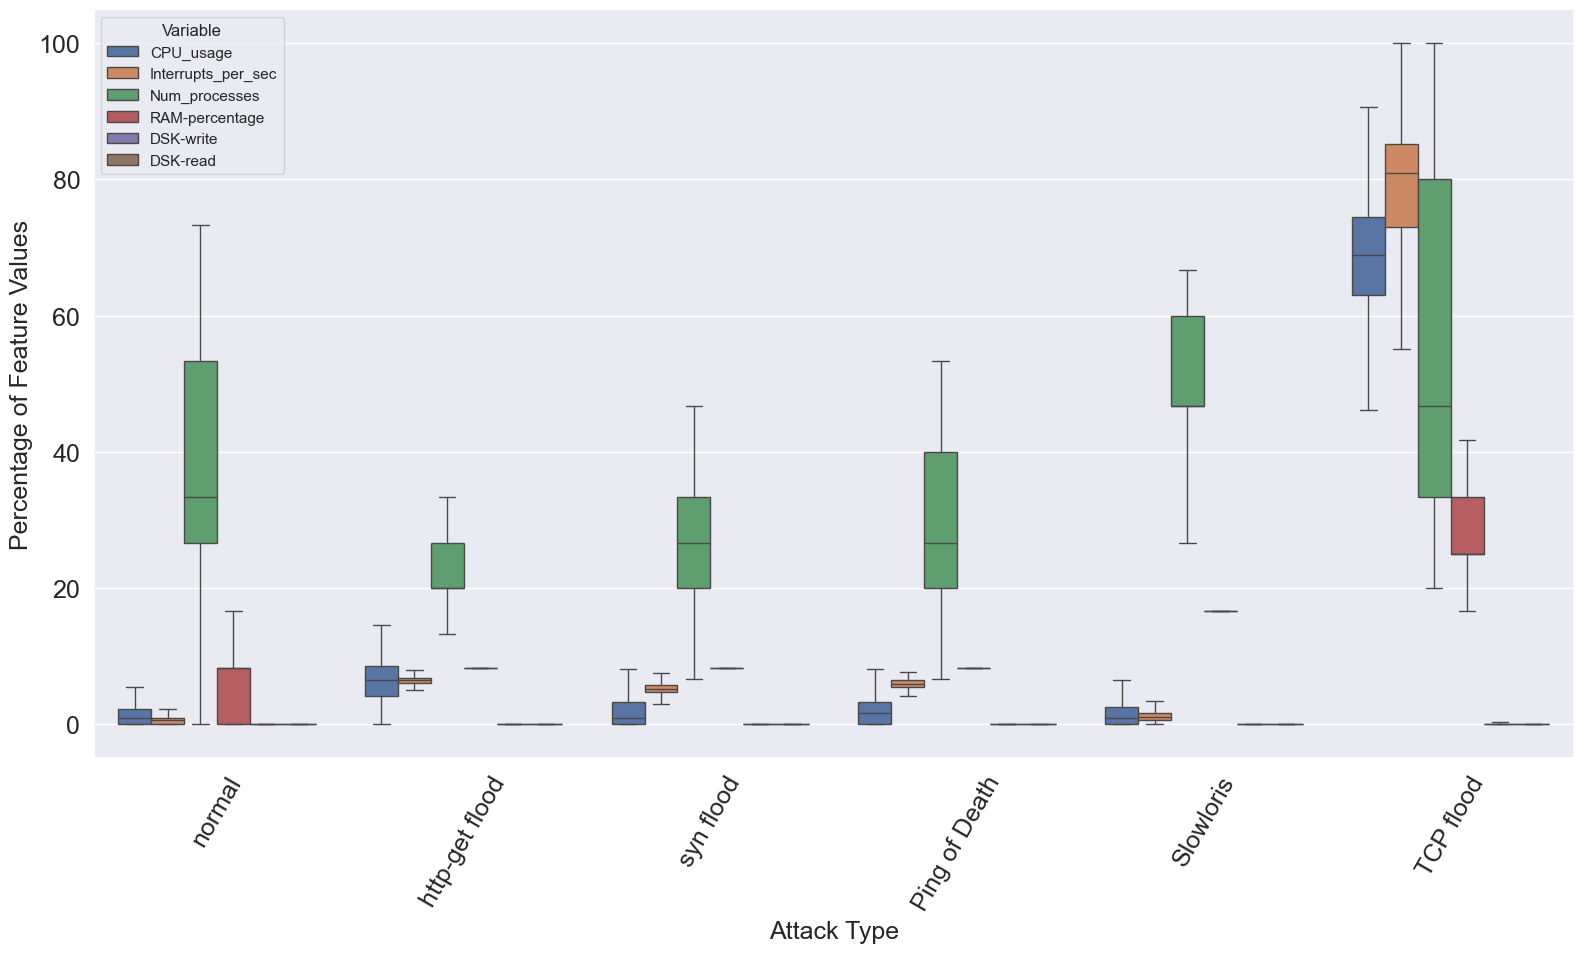

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dfn = pd.DataFrame(data)
# Set a larger font size for the plot
sns.set(rc={'font.size': 12})


# Reshape the DataFrame using melt
df_melted = pd.melt(dfn, id_vars='Attack_Type', var_name='Variable', value_name='Value')

plt.figure(figsize=(16, 10))
# Box plot based on the 'Labels' column for both variables
sns.boxplot(x='Attack_Type', y='Value', hue='Variable', data=df_melted, showfliers=False)
# Rotate x-axis labels vertically
plt.xticks(rotation=60, fontsize=18)
plt.yticks(fontsize=18)
# Set y-axis label
plt.xlabel('Attack Type', fontsize=18)
plt.ylabel('Percentage of Feature Values', fontsize=18)
# plt.title('Percentage of Feature Values')
plt.tight_layout(rect=[0, 0, 1, 0.97])  # Adjust the subplot layout
plt.savefig('figure/ddos-sys.png')
plt.show()

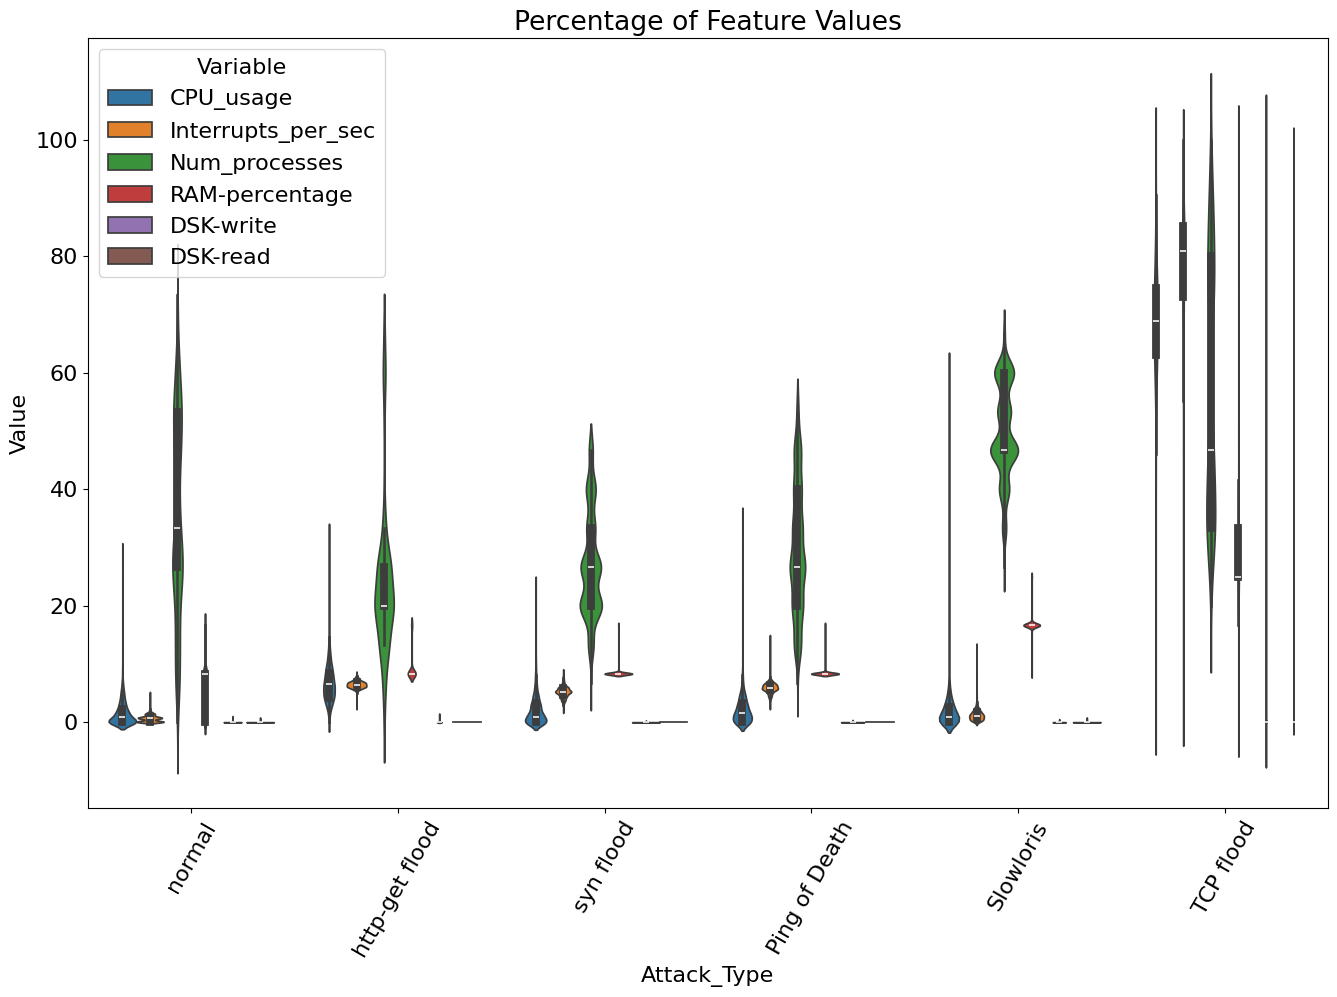